In [ ]:
#Metacritic and imdb Movies Data Review Portfolio--Michael Luong--DA320 

#Understanding where your source is coming from and analyzing data with charts can be highly beneficial espcially when making business decisions.
#In this report we will be acessing the question about Metacritic and Imdb Superhero Movies by asking "What factors affect gross sales?" and making sense of these 
#factors that affect gross sales and the success that the production had in relation to ratings.The variables
#that allow us to make these predictions relate to average budget, a heat map to determine narrow down on these facors, and average ratings to understand the success of the production.
#The following charts in the form of a histrogram, heatmap, and scattorplot support our question to better understand our data regarding Metacritic and Imdb movies.

In [6]:
#Import functions to generate charts from the imb superhero movies and metacritc movies files.

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import pymongo 
from pymongo import MongoClient
import pprint
import pandas as pd
from pandas import DataFrame




In [7]:
#connect to data base
import json

with open('C:\\Users\\Garho\\Desktop\\DA320\\Week 5\\credentials.json') as f:
    data = json.load(f)
    mongo_conn_str = data['mongodb']

In [8]:
client = pymongo.MongoClient(mongo_conn_str)

db = client.Movies

serverStatusResult=db.command("serverStatus")

print(serverStatusResult)

{'host': 'cluster0-shard-00-02.kfbfv.mongodb.net:27017', 'version': '5.0.8', 'process': 'mongod', 'pid': 289268, 'uptime': 2186735.0, 'uptimeMillis': 2186735174, 'uptimeEstimate': 2186735, 'localTime': datetime.datetime(2022, 5, 22, 2, 37, 41, 290000), 'asserts': {'regular': 0, 'warning': 0, 'msg': 0, 'user': 0, 'rollovers': 0}, 'connections': {'current': 13, 'available': 487, 'totalCreated': 114}, 'extra_info': {'note': 'fields vary by platform', 'page_faults': 0}, 'network': {'bytesIn': 1696134, 'bytesOut': 36836122, 'numRequests': 10581}, 'opcounters': {'insert': 0, 'query': 17, 'update': 0, 'delete': 0, 'getmore': 5, 'command': 10553, 'deprecated': {'query': 0, 'getmore': 0}}, 'opcountersRepl': {'insert': 0, 'query': 0, 'update': 0, 'delete': 0, 'getmore': 0, 'command': 0, 'deprecated': {'query': 0, 'getmore': 0}}, 'repl': {'topologyVersion': {'processId': ObjectId('62684406f410b1241a680ed1'), 'counter': 6}, 'hosts': ['cluster0-shard-00-00.kfbfv.mongodb.net:27017', 'cluster0-shard-

In [9]:
cursor = db["critics"].find()
metacritic = pd.DataFrame(list(cursor))
print(metacritic)

                            _id movie_id                           title  \
0      62709ef5a09dfea60c507a42    11243                  Sound and Fury   
1      62709ef5a09dfea60c507a3f    11240                         Traffic   
2      62709ef5a09dfea60c507a39    11234  Crouching Tiger, Hidden Dragon   
3      62709ef5a09dfea60c507a53    11260                          Praise   
4      62709ef5a09dfea60c507a3a    11235                           Yi Yi   
...                         ...      ...                             ...   
10823  62709f02a09dfea60c50a432    21979                         Rebecca   
10824  62709f02a09dfea60c50a447    22000                          Scoob!   
10825  62709f02a09dfea60c50a457    22016                      Desperados   
10826  62709f02a09dfea60c50a45e    22023                            2067   
10827  62709f02a09dfea60c50a467    22032                    The Stand In   

      release_date                                        description score  \
0       

In [10]:
cursor = db["iamdb"].find()
imdb = pd.DataFrame(list(cursor))
print(imdb)

                          _id       ID                           Title  \
0    62812a7a13cb913b66825397  3385516               X-Men: Apocalypse   
1    62812a7a13cb913b6682537d  1477834                         Aquaman   
2    62812a7a13cb913b66825380   448115                         Shazam!   
3    62812a7a13cb913b668253bb  1228705                      Iron Man 2   
4    62812a7a13cb913b668253c9    78346                        Superman   
..                        ...      ...                             ...   
479  62812a7a13cb913b66825525   203520                 Moon Mask Rider   
480  62812a7a13cb913b66825527  2317726                The Rising Light   
481  62812a7a13cb913b6682552b  1667826            Champion Road: Arena   
482  62812a7a13cb913b6682554e  3843930         TKO an Human Experiment   
483  62812a7a13cb913b66825556   319382  Eunhaeseo on Byeolddong dongja   

     Runtime  Rating     Votes                                 MPAARating  \
0      144.0     6.9  366812.0    

<function matplotlib.pyplot.show(close=None, block=None)>

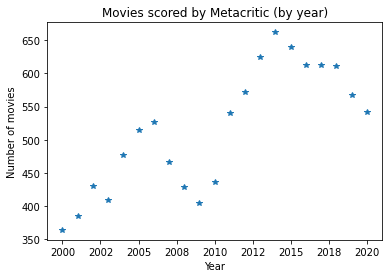

In [11]:
#How does the number of movies reviewed by Metacritic differ each year? Why are there more movies reviewed some years than others?

#In a scatter plot displayed below, we generate the amount of Movies that are scored by Metacritic each year.
# The following displays the total number of movies ranked by metacritic. 
# The number of movies is given on the y-axis and year given on the x-axis
# We can see that the number of movies reviewed and scored by Metracritic by year had an exponential increase from 2000-20005 and declined during the recession.
#The number of movies scored had another steep incrrease from 2000-2013. 
#The answer that we can get and make a conclusion about the following scatter plot regarding reviewed movies is a real-life related scenario due to the recession. 
#Movies had a deep decline in review due to less production and an extremely unstable economy. 
metacritic.release_date = pd.to_datetime(metacritic.release_date)

metacritic['year'] = metacritic.release_date.dt.year

metacritic['month'] = metacritic.release_date.dt.month

metacritic.head()
plt.title('Movies scored by Metacritic (by year)')

plt.xlabel('Year')

plt.ylabel('Number of movies')

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
dataframe = metacritic['release_date'].groupby(metacritic.release_date.dt.year).agg('count')
plt.plot(dataframe,'*')
plt.show




Text(0.5, 1.0, 'Gross Sales')

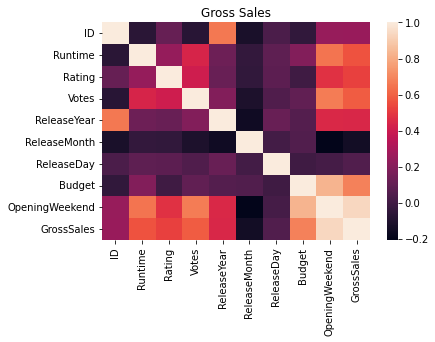

In [18]:
#"Does the following relase month of a movie have an effect on the gross sales of the movie?"

#The heat map of the imdb movies demonstrates the value of interest change depending on the values of other variables
#We can visualize patterns with the large amount of data at a glance
#The brighter values indicate less common values meanwhile the darker represent more common values
#We learn that the heatmap is a useful technique to identify how valuable our dataset is.
#The answer and conclusion that we can make from the following heat map is that opening weekend and gross slaes are almost perfectly correlated.
#Therefore, openeing weekend has a direct effect on the gross sales of a movie release.

sns.heatmap(imdb.corr())
plt.title('Gross Sales')




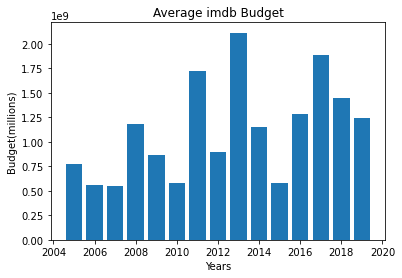

ReleaseYear
2005    7.721800e+08
2006    5.574500e+08
2007    5.522500e+08
2008    1.184592e+09
2009    8.691927e+08
Name: Budget, dtype: float64

In [23]:
#"What do the following average budgets in the years look like for imdb superhero movies?"

#This bar chart can be helpful in determining a business question for a company to compare with rivals.
#The data from the imdb file is extracted to produce the budget vs. release year chart
#The average budget is given for the movies in the years after 2005.
# A drastic increase in average budget from 2012-2013.
#We are able to draw the conclusion of the average budget from bar chart below for the years that the average budget was for Imdb movies.
#We can also make the conclusion that every year the budgets for the production companies fluctuate based on what movies have been released. 
dataframe = imdb['Budget'].groupby(imdb.ReleaseYear).agg('sum')
dataframe = dataframe[dataframe.index >= 2005]
plt.bar(dataframe.index,dataframe.values)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.title('Average imdb Budget')

plt.xlabel('Years')

plt.ylabel('Budget(millions)')
plt.show()

dataframe.head()



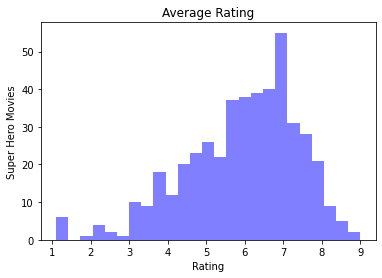

In [15]:
#"What is the average rating for Imdb movies? How can we compare this with the overall movies?""

#The following histogram displays the imdb rating the for the superhero movies.
#We can see that overall, there is an average of a 7 rating with a fair amount of 5 and 6 ratings.
#We can draw conclusions that better help our understanding of where our ratings as a production stand relative to other rivals where ratings is a good indicator of how well the production went.
#Most importantly we are able to get an insight on what our gross sales will be based on ratings due to the factors from the heat map and well correlated they are.

n, bins, patches = plt.hist(imdb.Rating,25, facecolor='blue', alpha=0.5)

plt.title('Average Rating')

plt.xlabel('Rating')

plt.ylabel('Super Hero Movies')

plt.show()



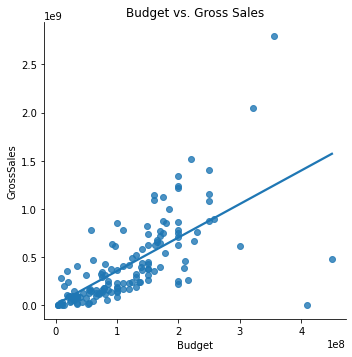

In [27]:
sns.lmplot(x="Budget",y="GrossSales",ci=None, data=imdb)
#Again looking back at our budget, we can create a scatterplot to get an insight on what our gross sales would look like based on our budget.
#There seems to be a positvie correlation between budget and gross sales.
plt.title('Budget vs. Gross Sales')
plt.show()

In [ ]:
#Our Findings:
#The following graphs can propose and answer many business questions that may be addressed within a company.
#The heatmap demonstrates that there is a almost perfect correlation between gross sales and openening weekend. Other important factors were average budget and rating.
#The scatter plot shows a postive correlation between Gross Sales and Budget. This can be helpful in determining if having a higher budget will return in higher gross sales. 
#We are able to conclude that the average rating of superhero movies subside around 7-8 on average which demonstrates from the heatmap that it is an important factor of determining gross sales.
#The budget in the imdb movies flucuate on average yearly and we could infer that the investment of production companies ensure that enough money is saved yearly to produce a big movie (potential business strategy).
#One thing that stood out to me was the amount of movies reviewed in 2008 (likely due to the recession). We can relate this data to real life scenarios and draw connections from creating charts from the data.
#Overall, we can draw conclusions from the various charts that improving gross sales for the superhero movies can be highly beneficial if we focus on the factors of opening weekend and budget.
#The large amount of data can be overwhelming at times but when we narrow down the charts and information that we want, data becomes more effective.